# S1. Multilingual Models


Up to this point, our tutorials have focused almost exclusively on NLP applications using the English language. While the general algorithms and ideas extend to all languages, the huge number of resources that support English language NLP do not extend to all languages. For example, BERT and BERT-like models are an incredibly powerful tool, but model releases are almost always in English, perhaps followed by Chinese, Russian, or Western European language variants. 

For this reason, we're going to look at an interesting category of BERT-like models referred to as **Multilingual Models**, which help extend the power of large BERT-like models to other less prominent languages.


## 1.1. Multilingual Model Approach


Multilingual models take a rather bizarre approach to addressing multiple languages...

Rather than treating each language independently, a multilingual model is *pre-trained* on text coming from a mix of languages! 

In this Notebook, we'll be playing with a specific multilingual model named  **XLM-R** from Facebook. 

While the original BERT was pre-trained on English Wikipedia and BooksCorpus (a collection of self-published books) XLM-R was pre-trained on Wikipedia and Common Crawl data from **100 different languages**! Not 100 different models trained on 100 different languages, but a *single* BERT-type model that was pre-trained on all of this text together. 



![Difference in pre-training](https://drive.google.com/uc?id=1W0NEUcNqygscj4xehwh_IIOXuMRJLEOF)


There really isn't anything here that's trying to deliberately differentiate between languages. For example, in XLM-R:
* There is a single, shared vocabulary (with 250k tokens) to cover all 100 languages. 
* There is no special marker added to the input text to indicate what language it is.
* We're not giving it "parallel data" (the same sentence in multiple languages).
* We haven't modified the training objective to encourage it to learn how to translate. 

And yet, instead of predicting nonsense or having only the barest understanding of any of its many input languages, XLM-R performs surprisingly well, even compared to models trained on a single language! 



## 1.2. Cross-Lingual Transfer


In this Notebook, we will apply XLM-R to a task called "Natural Language Inferencing" (which we'll describe in a later section). 

As with any BERT model, we'll download the pre-trained XLM-R weights, but before we can apply it to "NLI" we have to add a classification layer to the end, and then fine-tune the whole thing on *labeled* NLI examples.

Here is the amazing part--we will fine-tune XLM-R  *only on English training examples*, and then apply it to a test set in *Turkish*!

This impressive feat is referred to as **Zero-Shot Learning** or **Cross-Lingual Transfer**. 

**TODO** - Illustration?


## 1.3. Why Multilingual?



This Multilingual approach is impressive, but couldn't Facebook have just trained and published a separate model for each of these different languages? 

That would probably produce the most accurate models, yes--if only there was as much text available online in every language as there is English!

> A model pre-trained on text from only a single language is called **monolingual**, while those trained on text from multiple languages are called **multilingual**. 

The following bar plot shows, for a small selection of languages, how much text data the authors of XLM-R were able to gather for pre-training.



![Bar plot of training data for example languages](https://drive.google.com/uc?id=1VzrIB_5RKgVlAwEbG2sIQkhsXqm-rHaN)



Note that the scale is logarithmic, so there is roughly 10x more English data than Arabic or Turkish, and 1,000x more English than Yiddish.



## 1.4. Languages by Resource


Different languages have different amounts of training data available to create large, BERT-like models. These are referred to as **high**, **medium**, and **low-resource** languages. High-resource languages like English, Chinese, and Russian have lots of freely available text online that can be used as training data. As a result, NLP researchers have largely focused on developing large language models and benchmarks in these languages.

I adapted the above bar plot from Figure 1 of the XLM-R [paper](https://arxiv.org/pdf/1911.02116.pdf). Here is their full bar plot, which shows the amount of data for 88 of the 100 languages. 



![Bar plot of training data for 88 languages](https://drive.google.com/uc?id=1WAh9OYT2CUR5TGXGOzkn_uRVeBc0y2O_)



The languages are labeled using two-letter ISO codes--you can look them up in the table [here](https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes
).

Here are the first ten codes in the bar plot (note that there are another ~10 languages after German with a similar amount of data).

| Code | Language        |
|------|-----------------|
| en   | English         |
| ru   | Russian         |
| id   | Indonesian      |
| vi   | Vietnamese      |
| fa   | Persian / Farsi |
| uk   | Ukranian        |
| sv   | Swedish         |
| th   | Thai            |
| ja   | Japanese        |
| de   | German          |

Note that this ranking of "quantity of data" does not match the rankings of how many *users* there are on the internet in each language. Check out [this table](https://en.wikipedia.org/wiki/Languages_used_on_the_Internet#Internet_users_by_language) on Wikipedia. Chinese (code `zh`) is number 21 in the bar plot, but by far has the most users (after English).

Similarly, the amount of *effort and attention* given to different languages by NLP researchers does not follow the ranking in the bar plot--otherwise Chinese and French would be in the top 5.

## 1.5. Leveraging Machine Translation


It's possible to involve "Machine Translation" (machine learning models that automatically translate text) to try and help with this problem of limited language resources.

For example, if your application is in French, here are two (different) ways  translation could be involved.

Approach #1 - *French-to-English* 
* You could rely entirely on English models, and translate any and all French text in your application to English. 

Approach #2 - *English-to-French*: 
* During training, you could translate available English text into French, and use this translated text to augment your available French training data.

These are interesting techniques (especially in high resource languages where we have good translation models), and we'd like to publish another post on this topic.

Overall, though, translation has the same problems as the monolingual model approach! The best translation tools use machine learning, and have the same limitation around available training data. In other words, the translation tools for medium and low resource languages aren't good enough to be an easy solution to our problem--currently, a multilingual BERT model like XLM-R is probably the better way to go. 


## 1.6. Should I use Monolingual or Multilingual?


The answer is straightforward at the far ends of the spectrum of available resources:
1. For **high-resource** languages (French, Chinese, Russian), a **monolingual** model will likely perform best.
2. For **low-resource** languages (Yoruba, Ido, Chuvash, etc.), a monolingual model may not even exist! Multilingual models are your best place to start.

**Finding Models**

More and more researchers and NLP practicioners are taking the time to gather data and train and upload monolingual models in low and medium resource langauges. 

It's worth searching Google or huggingface [community models](https://huggingface.co/models) for your language. If something is available, good! You can see our [tutorial](http://mccormickml.com/2020/06/22/domain-specific-bert-tutorial/) for importing and using community huggingface models. If nothing is available, you should then try multilingual models, as we will demonstrate in this tutorial.

**Additional Pre-Training**

One way to improve the accuracy of a multilingual model is to continue pre-training the model with text from the language(s) you're interested in using. Remember that pre-training is an unsupervised process, and all you need is raw text. See our [tutorial](https://www.chrismccormick.ai/offers/CfBWiVHe) for how to continue pretraining a language model on additional data.

# S2. Example Dataset

## 2.1. Natural Language Inferencing

To illustrate the use of a multilingual model, we are going to apply the XLM-Roberta model to a task called **Natural Language Inferencing (NLI)**.

In NLI, we are given two sentences: (1) a "premise" and (2) a "hypothesis" and asked to determine whether:
* 2 follows logically from 1 (This is called "**entailment**")
* 2 contradicts 1 ("contradiction")
* 2 has no effect on 1 ("neutral") 

Here are some examples:

|  Premise |  Label | Hypothesis  |
|---|---|---|
| The man inspects his uniform.  |  Contradiction |  The man is sleeping. |
| An older and younger man smiling.  | Neutral  | Two men are smiling and laughing at the cats.  |
| A soccer game with multiple males playing.  | Entailment  | Some men are playing a sport.  |

> As I understand it, NLI is primarily a *benchmarking task* rather than a practical application--it requires the model to develop some sophisticated skills, so we use it to evaluate and benchmark models like BERT.

We'll actually be using a combination of two datasets named "MNLI" and "XNLI".

MNLI will provide us with a large number of English training examples to fine-tune XLM-Roberta on the general task of NLI. 

XNLI will provide us with a small number of NLI test examples *in different languages*. We're going to take our XLM-Roberta model (which we have fine-tuned only on English NLI examples) and apply it to the **Turkish** test cases from XNLI. We won't be doing any fine-tuning of the model on Turkish!


## 2.2. Overview of MNLI and XNLI

**About MNLI**

The **[Multi-Genre Natural Language Inference](https://cims.nyu.edu/~sbowman/multinli/)** (MultiNLI or MNLI) corpus was published in 2018, and is a collection of more than 400,000 *English* sentence pairs annotated with textual entailment information. 

> In MNLI, 'Multi' refers to Multi-Genre, not Multilingual. Confusing, I know! It's called "Multi-Genre" because it is intended as a successor to the Stanford NLI corpus (SNLI), which is composed entirely of somewhat simple sentences drawn from image captions. MNLI increases the difficulty of the task by adding multiple and more difficult "genres" of text like transcribed conversations, government documents, travel guides, etc. 

This corpus contains 392,000 training examples, 20,000 "development examples" (test samples to use while developing your model), and 20,000 "test examples"(the final test set on which benchmark scores are reported).



**About XNLI**

"XNLI" stands for Cross-lingual Natural Language Inference corpus. The paper ([here](https://arxiv.org/pdf/1809.05053.pdf)) was first submitted to [arXiv](https://arxiv.org/abs/1809.05053) in September, 2018. 

This dataset consists of a smaller subset of examples from the MLNI dataset which have been human-translated to 14 different languages (for a total of 15 languages, if you include English): 

| Index | Code | Language   |
|-------|------|------------|
| 0     | ar   | Arabic     |
| 1     | bg   | Bulgarian  |
| 2     | de   | German     |
| 3     | el   | Greek      |
| 4     | en   | English    |
| 5     | es   | Spanish    |
| 6     | fr   | French     |
| 7     | hi   | Hindi      |
| 8     | ru   | Russian    |
| 9     | sw   | Swahili    |
| 10    | th   | Thai       |
| 11    | tr   | Turkish    |
| 12    | ur   | Urdu       |
| 13    | vi   | Vietnamese |
| 14    | zh   | Chinese    |

XNLI does not provide training data for these different languages, so it's intended as a benchmark for the crosslingual approach that we will be taking here. 

For each language there are 5,000 test set sentence pairs and 2,500 development set sentence pairs.

> [Sam Bowman](https://cims.nyu.edu/~sbowman/) at NYU was behind both the MNLI and XNLI datasets. XNLI was done as a collaboration with Facebook. 




## 2.3. Download and Inspect Datasets



We'll be using PyTorch and the huggingface `transformers` library for this Notebook. However, we are going to load the MNLI and XNLI datasets using `tfds` (tensorflow datasets), simply because it provides a simple and convenient way of retrieving the dataset. 

> *If you're not familiar with `tfds`, it's worth checking out--it offers a large catalog of popular machine learning benchmark datasets for you to experiment with. You can browse the catalog and guide [here](https://www.tensorflow.org/datasets/catalog/overview) and check out our quick Colab tutorial on downloading the data [here](https://colab.research.google.com/drive/1Qwbw9se6uE1Ib8_sMToTF3lh7qqXVC8B).*

In [ ]:
# Import tfds and tensorflow
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
# Utilities
from time import time
from PIL import Image
from zipfile import ZipFile
import os, sys, itertools, re
import warnings, pickle, string

In [ ]:
# Block which runs on both Google Colab and Local PC without any modification
if 'google.colab' in sys.modules:    
    project_path = "/content/drive/My Drive/"
    # Google Colab lib
    from google.colab import drive
    # Mount the drive
    drive.mount('/content/drive/', force_remount=True)
    sys.path.append(project_path)
    %cd $project_path

# Let's look at the sys path
print('Current working directory', os.getcwd())

Mounted at /content/drive/
/content/drive/My Drive
Current working directory /content/drive/My Drive


### MNLI

The MNLI dataset is large (over 400k samples!), which can make training slow. Because of this, we'll take a smaller sample of the dataset so that we can run fine-tuning in a reasonable amount of time.

In [ ]:
# Download the training data for the Multi-Genre NLI dataset 
# Note that this dataset is all English! 

# Take 10,000 samples
#mnli_dataset = tfds.load(name="multi_nli", split="train[:10000]")

# Take 40,000 samples
mnli_dataset = tfds.load(name="multi_nli", split="train[:10000]")

Shuffling and writing examples to /root/tensorflow_datasets/multi_nli/plain_text/1.0.0.incompleteHEIWZM/multi_nli-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/multi_nli/plain_text/1.0.0.incompleteHEIWZM/multi_nli-validation_matched.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/multi_nli/plain_text/1.0.0.incompleteHEIWZM/multi_nli-validation_mismatched.tfrecord


Dataset multi_nli downloaded and prepared to /root/tensorflow_datasets/multi_nli/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
mnli_dataset

<PrefetchDataset shapes: {hypothesis: (), label: (), premise: ()}, types: {hypothesis: tf.string, label: tf.int64, premise: tf.string}>

In [ ]:
for i in mnli_dataset.shuffle(256).take(20):
  print (i['label'].numpy(), i['premise'].numpy())

2 b"I think it is...an enjoyable activity.'"
1 b'and um who are the other two he stole two associates'
1 b"oh the the Dodgers the Dodgers have got an interesting thing they've got this uh rookie pitcher what's it Martinez his name that uh that pitched a bunch of innings last year as a nineteen or twenty year old year old and they were using what happened to Valenzuela as an example that they should be careful and not over work him this early of course i was really uh"
0 b"Reachable only by boat until recently, they are linked by a network of ancient cliffside mule paths that provide some of Italy's loveliest treks."
2 b'Vardhamana Mahavira was its founder.'
0 b'Their arcades, fluted pillars, and mosaic tiles are teetering on last legs, praying for restoration miracles.'
2 b'The palace stands at the head of the wide Durbar Marg avenue leading south.'
1 b'Russia invaded Poland and in 1792-1793 it, along with Prussia, imposed a second partition of Poland, annulling the constitution and es

For MNLI and XNLI, the labels are as follows:
- 0 = entailment
- 1 = neutral
- 2 = contradiction

Let's take a look at an example from MNLI:





In [ ]:
import textwrap

# Wrap text to 80 characters.
wrapper = textwrap.TextWrapper(width=80, initial_indent='    ', 
                               subsequent_indent='    ') 

# To help interpret the labels, define a map from label ID to type.
label_names = ['entailment', 'neutral', 'contradiction']

# Retrieve a few random examples.
for ex in mnli_dataset.shuffle(buffer_size=256).take(count=3):
  
    # 'ex' is a Python dictionary representing one example, with three fields.
    
    # The fields are Tensors, so we call `numpy` to cast them to
    # basic types, and then `decode` to convert from bytes to strings.
    premise = ex['premise'].numpy().decode("utf-8")
    hypothesis = ex['hypothesis'].numpy().decode("utf-8")

    print("Premise:")
    print(wrapper.fill(premise))
    
    print("Hypothesis:")
    print(wrapper.fill(hypothesis))
  
    # Retrieve the label value for this example, and look up the label name.
    label = ex['label'].numpy()
    label_name = label_names[label]

    print("Label:")
    print("    {:} ({:})".format(label, label_name))

    print('\n----------------\n')



Premise:
    According to the New York Times , a congressional report accuses the
    Pentagon of funding a top-secret Air Force program, an $800 million
    satellite, a high-tech missile defense system previously rejected by
    Congress, and other unapproved purchases.
Hypothesis:
    The Pentagon is funding many unapproved purchases according to a
    congressional report.
Label:
    0 (entailment)

----------------

Premise:
    But I am there at the desk at 11:01.
Hypothesis:
    I sat at the desk at 11:01pm.
Label:
    1 (neutral)

----------------

Premise:
    They really like that, Contreras said.
Hypothesis:
    Contreras told us it was not appreciated.
Label:
    2 (contradiction)

----------------



In each example, the hypothesis sentence following the premise sentence is either entailed, a contradiction, or neutral. 

It's worth noting that many of these examples are ambiguous, and even the human labelers disagreed about some of them--especially in cases where the hypothesis is borderline neutral. Despite that, BERT models still perform very well on this benchmark! 

### XNLI



In [ ]:
# Retrieve the test set sentence pairs (contains all 14 languages!)
xnli_dataset = tfds.load(name='xnli', split="test")

Shuffling and writing examples to /root/tensorflow_datasets/xnli/1.1.0.incompleteBXWEDS/xnli-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/xnli/1.1.0.incompleteBXWEDS/xnli-validation.tfrecord


Dataset xnli downloaded and prepared to /root/tensorflow_datasets/xnli/1.1.0. Subsequent calls will reuse this data.


The examples in this dataset still have just 3 fields--premise, hypothesis, and label--but the 'premise' and 'hypothesis' fields each contain 15 different strings, one for each language.

Here is what one of the examples looks like (after casting from TensorFlow types, and with some indentation applied and the arrays truncated).

```
{'premise': {'ar': b'\xd8\xad\xd8\xb3\xd9\x86\xd9\x8b\xd8\xa7 \xd8\x8c \xd8\xa8
             'bg': b'\xd0\xbe, \xd0\xb4\xd0\xb0, \xd0\xbd\xd1\x8f\xd0\xba\xd0\x
             'de': b'Oh ja, ein paar Orte sind gut, wenn man sie per UPS oder o
             'el': b'\xce\xbd\xce\xb1\xce\xb9 \xce\xba\xce\xb1\xce\xbb\xce\xac 
             'en': b'oh yeah well some some places are good about sending them 
             'es': b'oh, s\xc3\xad, bueno algunos lugares son buenos en cuanto 
             'fr': b"oh ouais certains endroits sont bons en ce qui concerne d'
             'hi': b'\xe0\xa4\x93\xe0\xa4\xb9 \xe0\xa4\xb9\xe0\xa4\xbe\xe0\xa4\
             'ru': b'\xd0\xbe \xd0\xb4\xd0\xb0 \xd0\xb5\xd1\x81\xd1\x82\xd1\x8c
             'sw': b'Naam kuna pahali pengine ni pazuri kuhusu kupeleka nje kwa
             'th': b'\xe0\xb9\x81\xe0\xb8\xab\xe0\xb8\xa1\xe0\xb8\x94\xe0\xb8\x
             'tr': b'ya evet asl\xc4\xb1nda baz\xc4\xb1 baz\xc4\xb1 yerler onla
             'ur': b'\xd8\xac\xdb\x8c \xdb\x81\xd8\xa7\xda\xba \xda\xa9\xda\x86
             'vi': b'\xe1\xbb\x93 v\xc3\xa2ng, c\xc3\xb3 nhi\xe1\xbb\x81u n\xc6
             'zh': b'\xe5\x93\xa6\xef\xbc\x8c\xe6\x98\xaf\xe7\x9a\x84\xef\xbc\x
            }                                                               
 'hypothesis': {'language': [b'ar', b'bg', b'de', b'el', b'en', b'es', b'fr', b
                'translation': [b'\xd8\xb3\xd9\x88\xd9\x81 \xd8\xaa\xd9\x82\xd
                                b'\xd0\x9d\xd1\x8f\xd0\xba\xd0\xbe\xd0\xb8 \xd
                                b'Manche Standorte verschicken ihre Produkte n
                                b'\xce\x9c\xce\xb5\xcf\x81\xce\xb9\xce\xba\xce
                                b'Some places will only ship their products by
                                b'Algunos lugares solo enviar\xc3\xa1n sus pro
                                b"Certains endroits n'exp\xc3\xa9dieront leurs
                                b'\xe0\xa4\x95\xe0\xa5\x81\xe0\xa4\x9b \xe0\xa
                                b'\xd0\x9d\xd0\xb5\xd0\xba\xd0\xbe\xd1\x82\xd0
                                b'Baadhi ya maeneo husafilisha bidhaa zao waki
                                b'\xe0\xb8\xaa\xe0\xb8\x96\xe0\xb8\xb2\xe0\xb8
                                b'Baz\xc4\xb1 yerler \xc3\xbcr\xc3\xbcnlerini 
                                b'Koi jahain sirf UPS media mail ke zarye apni
                                b'M\xe1\xbb\x99t s\xe1\xbb\x91 n\xc6\xa1i s\xe
                                b'\xe6\x9c\x89\xe4\xba\x9b\xe5\x9c\xb0\xe6\x96
                },
 'label': 1, 
}                                                                                                                                                  
```

In the above printout, the byte decoding hasn't been performed yet, so that's 
why you see all of the strange "\xe6" type tokens.

I'm not sure why the structure of the 'premise' and 'hypothesis' fields are different, but oh well! 

Let's check out a few examples in Turkish.

In [ ]:
import textwrap

# Wrap text to 80 characters.
wrapper = textwrap.TextWrapper(width=80, initial_indent='    ', 
                               subsequent_indent='    ') 

# To help interpret the labels, define a map from label ID to type.
label_names = ['entailment', 'neutral', 'contradiction']

#language = 'tr'
#language_i = 11

# Retrieve a few random examples from XNLI.
for ex in xnli_dataset.shuffle(buffer_size=256).take(count=3):
  
    # 'ex' is a Python dictionary representing one example, with three fields.
    
    # The fields are Tensors, so we call `numpy` to cast them to
    # basic types, and then `decode` to convert from bytes to strings.
    
    # Retrieve the turkish version of the premise using the language code 'tr'.
    premise = ex['premise']['tr'].numpy().decode("utf-8")
    
    print("Premise:")
    print(wrapper.fill(premise))

    # Retrieve the turkish version of the hypothesis, which is the 11th 
    # translation.
    hypothesis = ex['hypothesis']['translation'][11].numpy().decode("utf-8")

    print("Hypothesis:")
    print(wrapper.fill(hypothesis))
  
    # Retrieve the label value for this example, and look up the label name.
    label = ex['label'].numpy()
    label_name = label_names[label]

    print("Label:")
    print("    {:} ({:})".format(label, label_name))

    print('\n----------------\n')


Premise:
    ve, yani, orası dev bir plastik fabrikası, sanırım yüzde yetmiş beş civarı
    bir pazar payına sahipler
Hypothesis:
    Pazarın çoğunu kontrol ettiklerini düşünüyorum.
Label:
    0 (entailment)

----------------

Premise:
    evet evet benim yerim sen başladığında iki hafta alıyorsun ve sonra dört
    haftan olana kadar her yıl ve her yıl sana ekstra bir gün veriyorlar
Hypothesis:
    Süren her yıl artmaya devam ediyor.
Label:
    0 (entailment)

----------------

Premise:
    Bu kampanyaya yaptığınız 100$ veya daha fazla miktarda katkıya
    minnettarlığımızı göstermek için, sizi ve bir misafirinizi 23 Mart 2000
    Perşembe günü saat 17:00-20:00 arası Herron Hall'da özel bir resepsiyona
    davet ediyoruz.
Hypothesis:
    Kabul törenine katılmak için en az 10000$ bağış yapmalısın.
Label:
    2 (contradiction)

----------------



# S3. Tokenize English Training Data

In this section we'll tokenize our English training examples from the MNLI dataset.

First we'll need to install the `transformers` library.

In [ ]:
!pip install transformers

     |████████████████████████████████| 1.5MB 8.8MB/s 
     |████████████████████████████████| 2.9MB 17.4MB/s 
     |████████████████████████████████| 890kB 55.9MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=e419507fff6e7625bbe7debb8bda19d48a408dc5eaf85a1a2ff6d91d8626ba9e
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


For this example we'll be using the `base` model of XLM-Roberta. 

XLM-Roberta also includes a `large` variant, and some variants which have been fine-tuned for Named Entity Recognition on the "CONLL" dataset. Here's the full list of available variants.

    "xlm-roberta-base"
    "xlm-roberta-large"
    "xlm-roberta-large-finetuned-conll02-dutch"
    "xlm-roberta-large-finetuned-conll02-spanish"
    "xlm-roberta-large-finetuned-conll03-english"
    "xlm-roberta-large-finetuned-conll03-german"

(You may also find some other community-submitted variants by searching [here](https://huggingface.co/models?filter=xlm-roberta).)


In [ ]:
!pip install sentencepiece

     |████████████████████████████████| 1.1MB 7.8MB/s 


In [ ]:
import sentencepiece

In [ ]:
import torch
from transformers import XLMRobertaTokenizer

# Download the tokenizer for the XLM-Robert `base` model.
xlmr_tokenizer = XLMRobertaTokenizer.from_pretrained("xlm-roberta-base" )

## 3.1. Load the Tokenizer

In [ ]:
import torch
from transformers import XLMRobertaTokenizer

# Download the tokenizer for the XLM-Robert `base` model.
xlmr_tokenizer = XLMRobertaTokenizer.from_pretrained("xlm-roberta-base" )

Our NLI examples contain two sentences each--the 'premise' and 'hypothesis'.  

To feed the example into the model, we concatenate the two sentences together, but with a special separator token in between. BERT models also use "Segment Embeddings" to help the model distinguish the two sentences from one another.

For XLM-R, the convention is to use **<s\\>** as the beginning of sentence token and **</s\\>** as the end of sentence and sentence separation token. (Instead of **[CLS]** and **[SEP]** which you might be familiar with from BERT.)

The "encode_plus" function of the tokenizer takes care of this for us:

In [ ]:
sentence_1 = "Hey there reader!"
sentence_2 = "How are you today?"

# Encode the two sentences together.
encoded = xlmr_tokenizer.encode_plus(sentence_1, sentence_2)

# Print the IDs of the resulting tokens.
print ("Input IDs:      ", encoded['input_ids'])

# Convert the token IDs back to strings so we can check them out.
print ("Tokens:         ", xlmr_tokenizer.convert_ids_to_tokens(encoded['input_ids']))

# The tokenizer returns an attention mask, which masks out PAD tokens. 
# Since we aren't doing any padding yet, the mask is just all 1s. 
print ("\nAttention Mask: ", encoded['attention_mask'])


Input IDs:       [0, 28240, 2685, 155255, 38, 2, 2, 11249, 621, 398, 18925, 32, 2]
Tokens:          ['<s>', '▁Hey', '▁there', '▁reader', '!', '</s>', '</s>', '▁How', '▁are', '▁you', '▁today', '?', '</s>']

Attention Mask:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


## 3.2. Choose maximum sequence length

In order to tokenize the dataset, we'll need to pick a maximum sequence length value `max_len` which we will pad or truncate all sequences to.

To pick a reasonable value, we'll do a preliminary pass through the dataset to gather statistics on the lengths of the sequences in this dataset.

In [ ]:
import numpy as np

lengths_en = []

labels_en = []

print('Tokenizing comments to check sequence lengths...')

# Iterate through the dataset...
for ex in mnli_dataset:

    # Retrieve the premise and hypothesis strings. 
    premise = ex['premise'].numpy().decode("utf-8")
    hypothesis = ex['hypothesis'].numpy().decode("utf-8")
    
    # Report progress.
    if ((len(lengths_en) % 5000) == 0):
        print('  Tokenized {:,} samples.'.format(len(lengths_en)))
    
    # `tokenizer.encode` will tokenize the sentence, map the tokens to ids, 
    # and add the required special tokens.:
    encoded = xlmr_tokenizer.encode(
                        premise,
                        hypothesis,
                        add_special_tokens = True,
                   )

    # Record the length.
    lengths_en.append(len(encoded))

    labels_en.append(ex['label'].numpy())

print('DONE.')
print('{:>10,} samples'.format(len(lengths_en)))

Tokenizing comments to check sequence lengths...
  Tokenized 0 samples.
  Tokenized 5,000 samples.
DONE.
    10,000 samples


Let's grab some quick statistics--what are the min, max and median sample lenghts?

In [ ]:
print('   Min length: {:,} tokens'.format(min(lengths_en)))
print('   Max length: {:,} tokens'.format(max(lengths_en)))
print('Median length: {:,} tokens'.format(int(np.median(lengths_en))))

   Min length: 7 tokens
   Max length: 341 tokens
Median length: 42 tokens


To further analyze it, let's plot the distribution.


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


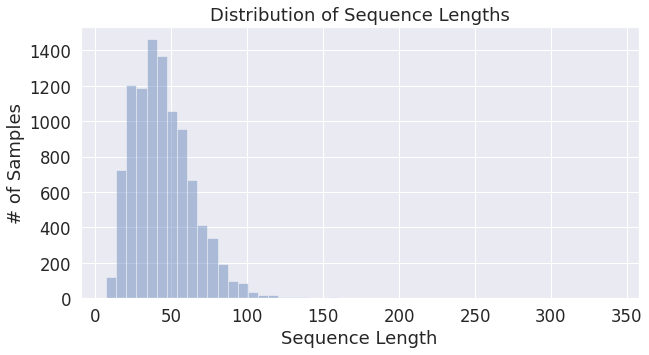

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (10,5)

# Plot the distribution of comment lengths.
sns.distplot(lengths_en, kde=False, rug=False)

plt.title('Distribution of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('# of Samples')

plt.show()

Interesting! Looks like a max_len of 128 should accomodate almost all of the samples.

In [ ]:
max_len = 128

# Count the number of sequences that are longer than `max_len` tokens.
num_truncated = np.sum(np.greater(lengths_en, max_len))

# Compare this to the total number of training sentences.
num_sentences = len(lengths_en)
prcnt = float(num_truncated) / float(num_sentences)

print('{:,} of {:,} sentences ({:.1%}) in the training set are longer than {:} tokens.'.format(num_truncated, num_sentences, prcnt, max_len))


42 of 10,000 sentences (0.4%) in the training set are longer than 128 tokens.


Finally, let's look at the class balance.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


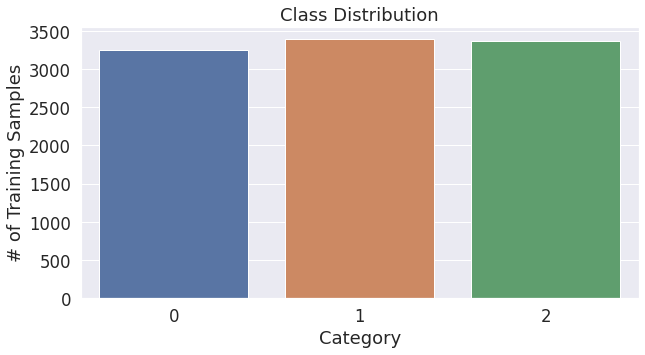

In [ ]:
# Plot the number of tokens of each length.
sns.countplot(labels_en)

plt.title('Class Distribution')
plt.xlabel('Category')
plt.ylabel('# of Training Samples')

plt.show()

Looks nice and balanced!

## 3.2. Tokenize English Training Exmaples

Now we're ready to truly tokenize the dataset, this time performing truncation and padding. We'll use the `encode_plus` function for this. 

In [ ]:
import torch

labels_en = []
input_ids_en = []
attn_masks_en = []

print('Encoding all examples...')

# Iterate through the dataset...
for ex in mnli_dataset:

    # Retrieve the premise and hypothesis strings. 
    premise = ex['premise'].numpy().decode("utf-8")
    hypothesis = ex['hypothesis'].numpy().decode("utf-8")

    # Convert sentence pairs to input IDs, with attention masks.
    encoded_dict = xlmr_tokenizer.encode_plus(premise, hypothesis, 
                                              max_length=max_len, 
                                              pad_to_max_length=True,
                                              truncation=True, 
                                              return_tensors='pt')

    # Add this example to our lists.
    input_ids_en.append(encoded_dict['input_ids'])
    attn_masks_en.append(encoded_dict['attention_mask'])
    labels_en.append(ex['label'].numpy())
    
# Convert each Python list of Tensors into a 2D Tensor matrix.
input_ids_en = torch.cat(input_ids_en, dim=0)
attn_masks_en = torch.cat(attn_masks_en, dim=0)

# Cast the labels list to a Tensor.
labels_en = torch.tensor(labels_en)

print('   DONE. {:,} examples.'.format(len(labels_en)))

Encoding all examples...


/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2179: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


   DONE. 10,000 examples.


## 3.3. Train-Validation Split

Split off 10% of our training examples to use for validation in between training passes. This will help us monitor our training progress and check for over-fitting.

In [ ]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids_en, attn_masks_en, labels_en)

# Create a 90-10 train-validation split. Calculate the number of samples to 
# include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

## 3.4. Set batch_size for DataLoaders

The PyTorch DataLoader class takes care of randomly grouping our training data into batches. 

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# Specify our batch size.
batch_size = 16

# Create the DataLoaders for our training sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )



# S4. Fine-Tune XLM-Roberta on English NLI

## 4.1. Load Pre-Trained Model

Load the pre-trained XLM-R `base` model. You can learn more about the XLM-R model in the [appendix](https://colab.research.google.com/drive/1Juv75CnoOyI2LJnV8Y7hw7hppo-DW9ur?usp=sharing#scrollTo=vAWILJ4wPH5Z).

The MNLI and XNLI tasks are both multiclass with 3 labels, so we need to add this when instantiating the model.

In [ ]:
from transformers import XLMRobertaForSequenceClassification
import torch

#from transformers import XLMTokenizer, XLMForSequenceClassification

xlmr_model = XLMRobertaForSequenceClassification.from_pretrained("xlm-roberta-base", num_labels=3)

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense

Connect to the GPU and load the model...

In [ ]:
print('Loading model to GPU...')

# Connect to the GPU.
device = torch.device('cuda')

# Report what GPU we were granted.
print('  GPU:', torch.cuda.get_device_name(0))

# Copy the initial model weights to the GPU.
desc = xlmr_model.to(device)

print('    DONE.')

Loading model to GPU...
  GPU: Tesla T4
    DONE.


## 4.2. Set Learning Rate & Epochs for Optimizer

In [ ]:
from transformers import AdamW

# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(xlmr_model.parameters(),
                  lr = 5e-6, # args.learning_rate
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs.
epochs = 1

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

A couple helper functions...

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))  


In [ ]:
def good_update_interval(total_iters, num_desired_updates):
    '''
    This function will try to pick an intelligent progress update interval 
    based on the magnitude of the total iterations.

    Parameters:
      `total_iters` - The number of iterations in the for-loop.
      `num_desired_updates` - How many times we want to see an update over the 
                              course of the for-loop.
    '''
    # Divide the total iterations by the desired number of updates. Most likely
    # this will be some ugly number.
    exact_interval = total_iters / num_desired_updates

    # The `round` function has the ability to round down a number to, e.g., the
    # nearest thousandth: round(exact_interval, -3)
    #
    # To determine the magnitude to round to, find the magnitude of the total,
    # and then go one magnitude below that.

    # Get the order of magnitude of the total.
    order_of_mag = len(str(total_iters)) - 1

    # Our update interval should be rounded to an order of magnitude smaller. 
    round_mag = order_of_mag - 1

    # Round down and cast to an int.
    update_interval = int(round(exact_interval, -round_mag))

    # Don't allow the interval to be zero!
    if update_interval == 0:
        update_interval = 1

    return update_interval

In [ ]:
import sys
if sys.version_info >= (3,):
    def input(__prompt: any = ...) -> str: ...
else:
    def input(__prompt: any = ...) -> any: ...
    def intern(__string: str) -> str: ...

In [ ]:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# Set the seed value all over the place to make this reproducible.
seed_val = 42
epoch=1
import random
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0,1):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    xlmr_model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 100 batches.
        if step % 500 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        xlmr_model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = xlmr_model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(xlmr_model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(format_time(time.time() - t0)))
      
print("")
print("Training complete!")


======== Epoch 1 / 1 ========
Training...
  Batch   500  of    563.    Elapsed: 0:03:40.

  Average training loss: 1.11
  Training epoch took: 0:04:08

Training complete!


In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
#               Validation
# ========================================
# After the completion of each training epoch, measure our performance on
# our validation set.

print("")
print("Running Validation...")

t0 = time.time()

# Put the model in evaluation mode--the dropout layers behave differently
# during evaluation.
xlmr_model.eval()

preds=[]
true=[]

# Tracking variables 
eval_loss, eval_accuracy = 0, 0
nb_eval_steps, nb_eval_examples = 0, 0

# Evaluate data for one epoch
for batch in validation_dataloader:
    
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    
    # Telling the model not to compute or store gradients, saving memory and
    # speeding up validation
    with torch.no_grad():        

        # Forward pass, calculate logit predictions.
        # This will return the logits rather than the loss because we have
        # not provided labels.
        # token_type_ids is the same as the "segment ids", which 
        # differentiates sentence 1 and 2 in 2-sentence tasks.

        outputs =  xlmr_model(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask)
    
    # Get the "logits" output by the model. The "logits" are the output
    # values prior to applying an activation function like the softmax.
    logits = outputs[0]

    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    
    preds.append(logits)
    true.append(label_ids)
    # Calculate the accuracy for this batch of test sentences.
    tmp_eval_accuracy = flat_accuracy(logits, label_ids)
    
    # Accumulate the total accuracy.
    eval_accuracy += tmp_eval_accuracy

    # Track the number of batches
    nb_eval_steps += 1

# Report the final accuracy for this validation run.
print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
print("  Validation took: {:}".format(format_time(time.time() - t0)))


Running Validation...
  Accuracy: 0.38
  Validation took: 0:00:07


In [ ]:
PATH = "/content/drive/MyDrive/xlm.pt"

# Save
torch.save(xlmr_model,PATH) 

# # Load

# model.load_state_dict(torch.load(PATH))
# model.eval()

In [ ]:
# Load
# Load
model = torch.load(PATH,map_location='cpu')
model.eval()

XLMRobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (La

In [ ]:
PATH = "/content/drive/MyDrive/xlm.pt"
model1 = torch.load(PATH, map_location='cpu')


In [ ]:
from transformers import XLMRobertaForSequenceClassification
import torch
xlmr_model1 = XLMRobertaForSequenceClassification.from_pretrained("xlm-roberta-base", num_labels=3)
tokenizer1 = XLMRobertaTokenizer.from_pretrained("xlm-roberta-base" )

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense

## 4.2. Training Loop

Let's view the summary of the training process.

First we'll put the statistics into a pandas DataFrame.

We don't appear to be over-fitting (validation loss is still going downward), so that's good!

In [ ]:
def Prediction(sentence_1,sentence_2):
  tokenizer1=XLMRobertaTokenizer.from_pretrained("xlm-roberta-base")
  model1=torch.load(PATH,map_location='cpu')
  line_tokenized=tokenizer1.batch_encode_plus(sentence_1,sentence_2)
  input_ids1=line_tokenized["input_ids"]
  attention_masks1=line_tokenized["attention_mask"]
  prediction_inputs1=torch.tensor(input_ids1)
  prediction_masks1=torch.tensor(attention_masks1)
  prediction_data1=TensorDataset(prediction_inputs1,prediction_masks1,label)
  prediction_dataloader1= DataLoader(prediction_data1,batch_size)
  # Put model in evaluation mode
  model1.eval()
# Tracking variables 
  predictions = []
  true_labels=[]
# Predict 
  for batch in prediction_dataloader1:
  # Add batch to GPU
    batch = tuple(t.to('cpu') for t in batch)
  # Unpack the inputs from our dataloader
    b_input_ids, b_input_masks,b_labels = batch
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
    with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs1 = model1(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_masks)
    logits1 = outputs1[0]
    label_ids = b_labels.to('cpu').numpy()

  # Move logits and labels to CPU
    logits1 = logits1.detach().cpu().numpy()

  # Store predictions and true labels
    predictions.append(logits1)
    flat_predictions = np.concatenate(predictions, axis=0)
    flat_true_labels = np.concatenate(true_labels, axis=0)
    predicted_labels = np.argmax(flat_predictions, axis=1).flatten()

    return flat_predictions

In [ ]:
sentence_3=['Two Men are smiling and laughing']
sentence_4=['Two Men are smiling and laughing']

Prediction(sentence_3,sentence_4)

# S5. Test on Turkish NLI


## 5.1. Tokenize Turkish Test Samples

OK! Let's retrieve and tokenize all of the Turkish sentences from the XNLI test set.

In [ ]:
import torch

labels_tr = []
input_ids_tr = []
attn_masks_tr = []
max_len=128

print('Encoding test examples...')

language_code = 'tr'
language_index = 11

# Iterate through the XNLI dataset...
for ex in xnli_dataset:
  

    # Retrieve the premise and hypothesis strings. 
    premise = ex['premise'][language_code].numpy().decode("utf-8")
    hypothesis = ex['hypothesis']['translation'][language_index].numpy().decode("utf-8")

    # Convert sentence pairs to input IDs, with attention masks.
    encoded_dict = tokenizer1.encode_plus(premise, hypothesis, 
                                              max_length=max_len, 
                                              pad_to_max_length=True,
                                              truncation=True, 
                                              return_tensors='pt')

    # Add this example to our lists.
    input_ids_tr.append(encoded_dict['input_ids'])
    attn_masks_tr.append(encoded_dict['attention_mask'])
    labels_tr.append(ex['label'].numpy())
    
# Convert each Python list of Tensors into a 2D Tensor matrix.
input_ids_tr = torch.cat(input_ids_tr, dim=0)
attn_masks_tr = torch.cat(attn_masks_tr, dim=0)

# Cast the labels list to a Tensor.
labels_tr = torch.tensor(labels_tr)

print('   DONE. {:,} examples.'.format(len(labels_tr)))

Encoding test examples...


/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2142: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


   DONE. 5,010 examples.


In [ ]:
# Construct a TensorDataset from the encoded examples.
from torch.utils.data import TensorDataset, random_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
batch_size = 16
prediction_dataset = TensorDataset(input_ids_tr, attn_masks_tr, labels_tr)

# And a dataloader for handling batching.
prediction_dataloader = DataLoader(prediction_dataset, batch_size=batch_size)


Finally, let's look at the class balance of our test set.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


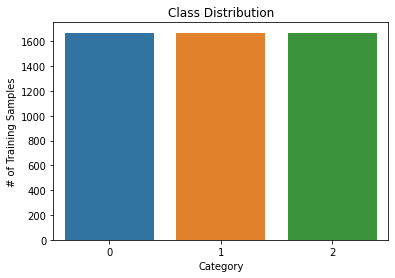

In [ ]:
# Plot the number of tokens of each length.

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.countplot(labels_tr.numpy())

plt.title('Class Distribution')
plt.xlabel('Category')
plt.ylabel('# of Training Samples')

plt.show()

The test set is also balanced, so we can rely on simple flat accuracy as our metric.

## 5.2. Run Prediction

Run all of our Turkish test samples through our model to get predictions!

In [ ]:
# Prediction on test set
print('Predicting labels for {:,} test sentences...'.format(len(input_ids_tr)))

# Put model in evaluation mode
model1.eval()

# Tracking variables 
predictions , true_labels = [], []

count = 0

# Predict 
for batch in prediction_dataloader:
    
    # Add batch to GPU
    batch = tuple(t.to('cpu') for t in batch)
    
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    
    # Telling the model not to compute or store gradients, saving memory and 
    # speeding up prediction
    with torch.no_grad():
        # Forward pass, calculate logit predictions
        outputs = model1(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)

    logits = outputs[0]

    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    
    # Store predictions and true labels
    predictions.append(logits)
    true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 5,010 test sentences...
    DONE.


To turn our model outputs into actual predictions, we need to:

1. Re-combine the predictions from across all of the batches.
2. Pick a class label for each prediction by choosing the class with the highest output value.

In [ ]:
# Combine the results across all batches. 
flat_predictions = np.concatenate(predictions, axis=0)
flat_true_labels = np.concatenate(true_labels, axis=0)

# For each sample, pick the label (0, 1, or 2) with the highest score.
predicted_labels = np.argmax(flat_predictions, axis=1).flatten()

Now we can measure our accuracy...

In [ ]:
# Tally the number of correct predictions to get our accuracy.
accuracy = (predicted_labels == flat_true_labels).mean()

print('XLM-R Prediction accuracy: {:.3f}'.format(accuracy))

We saw earlier that the test set is balanced, so random guessing should give an accuracy of 1-out-of-3 correct. Just to sanity check...

In [ ]:
# Randomly guess labels for all of the test samples.
random_labels = np.random.randint(low=0, high=2, size=(predicted_labels.shape))

# Calculate accuracy.
rand_accuracy = (random_labels == flat_true_labels).mean()

print('Random guessing accuracy: {:.3f}'.format(rand_accuracy))

The authors of XML-RoBERTa reported a score of 0.742 on Turkish in their [paper](https://arxiv.org/pdf/1911.02116.pdf) in Table 1:

![Turkish results](https://drive.google.com/uc?id=1WGfzITINY5ygVY8IoYAp1IshWNi6-QVw)



Our lower accuracy here (0.654) is at least partly due to only training on a subset of the full MLNI training set (we trained on 40,000 examples, only ~10% of the full dataset!). 

I also ran this experiment with only 10,000 training samples, and got a score of 0.554, so the additional training samples made a big difference! 

# Appendix

## A.1. About XLM-R



As of July 2020, the best multilingual model is XLM-R for ease of use (huggingface interface) and downstream performance. 



**Timeline of Multilingual BERT Models**

Up to this point there have only been a few major (BERT-like) multilingual language models, so a brief **multilingual BERT timeline** looks like this:

* Sep 2018 - **XNLI** ([paper](https://arxiv.org/pdf/1809.05053))
    * Authors: Conneau, Bowman et al. from Facebook and NYU
    * XNLI dataset introduced, enabling testing of different languages.
* Oct 2018 - **BERT** ([paper](https://arxiv.org/pdf/1810.04805))
    * Authors: Devlin et al. from Google
    * The original BERT
* Nov 2018 - **mBERT** (No dedicated paper? [GitHub](https://github.com/google-research/bert/blob/master/multilingual.md))
    * Authors: Devlin et al. from Google
    * This model is essentially BERT but trained with multiple languages instead of just English.
* Jan 2019 -  **XLM** ([paper](https://arxiv.org/pdf/1901.07291))
    * Authors: Lample and Conneau from Facebook
    * This model introduces some new techniques and multilingual training objectives and outperforms mBERT.
* Nov 2019 - **XLM-RoBERTa**, a.k.a. "XLM-R" ([paper](https://arxiv.org/pdf/1911.02116.pdf))
    * Authors: Lample, Conneau et al. from Facebook
    * This model improves on XLM largely by:
        * Increasing the amount of data used during pretraining
        * Carefully identifying which aspects of the pretraining regiment lead to the most successful downstream performance (the same approach that was used to make RoBERTa successful). 


**XLM-RoBERTa**

Earlier, in section 1.4., we used the following bar plot, taken from the XLM-R [paper](https://arxiv.org/pdf/1911.02116.pdf), to illustrate the problem of resources by language. In the paper, this figure was actually intended to illustrate the increase in data used to train XLM-R (blue) vs. the data used to train XLM and mBERT (orange).

![Bar plot showing increased data for XLM-R](https://drive.google.com/uc?id=1hIyP7UxuRXGqRLtqi8_uVHX4Twe8MPGV)

The XLM-R paper also studies aspects like how many languages to train, the size of the vocabulary, and how to choose a distribution of training samples from languages with different amounts of data. The result is a model that has been trained in attempt of an optimal balance for XNLI performance, but research from the authors provide recommendations for how a model could be optimally trained to favor another task, for example good performance on lots of low-resource languages with little attention paid to English performance.

Prior to these BERT-inspired approaches, translation and multilingual language models required supervised approaches with parallel data (the same sentence in multiple different languages) in large quantities, whereas models like XLM-R and mBERT take an unsupervised approach that does not require labeled data.